In [4]:
using JLD,PyPlot

In [5]:
nome="../JLDFiles/TrabajandoCentrosdeMasa/140116s2cut2_evento_2-Tray.jld"
nomecsd="../JLDFiles/TrabajandoCentrosdeMasa/140116s2cut2_evento_2.jld"

"../JLDFiles/TrabajandoCentrosdeMasa/140116s2cut2_evento_2.jld"

In [6]:
datostray=load(nome)
datoscsd=load(nomecsd)

Dict{String,Any} with 8 entries:
  "Canalesrespuesta" => Set(Array{Int64,1}[[27, 62], [36, 44], [37, 62], [48, 5…
  "KTilde"           => [0.922806 0.553188 … 0.0186325 0.0184857; 0.553188 0.92…
  "LFPTotal"         => [-4122.99 24.1699 … 24.1699 -26.1841; -16.1133 -22.1558…
  "CSDLindenberg"    => [-2.83702 28.2598 … 6.59675 -13.8075; -10.37 -4.86814 ……
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "K"                => [30.3419 15.5553 … 6.37984 6.25525; 15.5553 32.6147 … 6…
  "freq"             => 7.02206
  "CanalesSaturados" => Set(Array{Int64,1}[[47, 54], [39, 45], [54, 4], [1, 1],…

In [7]:
cmp=datostray["CatenarioPositivo"];
cmn=datostray["CatenarioNegativo"];
csd=datoscsd["CSDLindenberg"];
retraso=0
freq=datoscsd["freq"]

7.022058198545425

In [8]:
function reducecadetenario(Catenario::Dict, gordmin=25,minlong=7,maxlong=100)
    result=Dict{Integer, Array{Any}}()
    
for (k,p) in Catenario
    gordura=abs(p[:3])
    longus,gordus=size(p)
    if (mean(gordura)>gordmin) && (longus>minlong) && longus < maxlong
            result[k]=p
    end
end
    return result
end

function AntesQue(Datos::Array, tiempo)
    Cadena=[0 0 0 0]
 
    for a in eachindex(Datos[:,4])
        if Datos[a,4]<tiempo
  
            Cadena=vcat(Cadena, transpose(Datos[a,:]))
          
    end
end
    Cadena=Cadena[2:end,:]
    return Cadena
end


function DespuesQue(Datos::Array, tiempo)
    Cadena=[0 0 0 0]
    for a in eachindex(Datos[:,4])
        if Datos[a,4]>tiempo
            Cadena=vcat(Cadena, transpose(Datos[a,:]))
    end
end
    Cadena=Cadena[2:end,:]
    return Cadena
end




DespuesQue (generic function with 1 method)

In [10]:
cmpred=reducecadetenario(cmp,20,8,200);
cmnegred=reducecadetenario(cmn,20,8,200);

In [11]:
length(cmpred)

29

In [13]:
AntesQue(cmpred[15],15)

LoadError: [91mKeyError: key 15 not found[39m

In [69]:
ioff()
inicio=1000
fin=1500
retrazo=inicio
otrostiemposinteresantes=inicio:fin
#for cuadro in tiemposinteresantes
for cuadro in otrostiemposinteresantes
    
PyPlot.ioff()

ImagenCSD=csd[:,:,cuadro];

    figure(figsize=(3,3))
    axis("equal")

milisec=round((cuadro-retrazo)/freq,1)

title("t= $milisec ms")
   
    
tick_params(labelbottom="on", labelleft="on", direction="out")
xticks(fontsize=10)
yticks(fontsize=10)
xlim(0,65)
ylim(0,65)
limcsd=75
bolitasrojas=0
bolitasazules=0


    
tight_layout()

guacafondo=imshow(ImagenCSD, cmap="bwr", interpolation="bicubic", 
  vmin=-limcsd, vmax=limcsd, extent=[1,65,65,1])
#=
for (k,p) in cmpred

    paux=AntesQue(p,cuadro+1)
    paux=DespuesQue(paux,retrazo)
    cucho,fleto=size(paux)
     longus,falsus=size(p)

    if cucho>0
        #Si son chiquitos no nos interesan.
        xxpos=paux[:,1]
        yypos=paux[:,2]
        gordis=abs.(map(Float32, paux[:,3]))
        tiempos=round.(paux[:,4]/7.022,1)   
       # plot(xxpos, yypos, marker="o", markersize=1, color="maroon", lw=1,zorder=1900)
           # scatter(xxpos[end],yypos[end],marker="o",s=0.125*gordis, color="red",alpha=0.3)
            
       #=
        inicios=scatter(xxpos[1],yypos[1], s=40, edgecolors="black", 
        linewidth=2,
            facecolor="maroon", marker="o",zorder=1999 )
        =#
            #=    
        if paux[end,1]==p[end,1]
                finales=scatter(xxpos[end],yypos[end], s=20, edgecolors="orange", 
                linewidth=1,facecolor="crimson", marker="^", label="Final",zorder=2000 )
        else
                finales=scatter(xxpos[end],yypos[end], s=20, edgecolors="crimson", 
                linewidth=2,facecolor="none", marker="^", label="Final",zorder=2000 )
         end
      =#
   #     annotate(round(tiempos[1],1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
            if(length(tiempos)>1)
                dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                vel=round(dist*freq,1)
                annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="maroon", zorder=1950)
            end
      #      scatter(xxpos[end],yypos[end], s=gordis[end]*0.5, alpha=0.5, 
       #     c="darkorange", edgecolors="none")
    end

end


=#

for (k,p) in cmnegred

    paux=AntesQue(p,cuadro+1)
    paux=DespuesQue(paux,retrazo)
    cucho,fleto=size(paux)
     longus,falsus=size(p)
    #    println("Hola, soy asi de gordo ", mean(gordura))
        
        if  cucho>0
        #Si son chiquitos no nos interesan.
        xxpos=paux[:,1]
        yypos=paux[:,2]    
        gordis=abs.(map(Float32, paux[:,3]))
  
              tiempos= round.((paux[:,4]-retraso)/7.022,1)   
#            plot(xxpos, yypos, marker="o", markersize=1, color="cyan", lw=1,zorder=1998)
      
   #         scatter(xxpos[end],yypos[end],marker="o", s=0.125*gordis, color="blue",alpha=0.3)
            
    #        inicios=scatter(xxpos[1],yypos[1], s=40, edgecolors="black", 
    #    linewidth=2,
    #        facecolor="midnightblue", alpha=0.7, marker="o", label="Final",zorder=1999 )
            
 #=           
            if paux[end,1]==p[end,1]
                finales=scatter(xxpos[end],yypos[end], s=40, edgecolors="cyan", 
        linewidth=1,
                facecolor="midnightblue", marker="^", label="Final",zorder=2000 )
            else
                finales=scatter(xxpos[end],yypos[end], s=40, edgecolors="cyan", 
        linewidth=2,
                facecolor="none", marker="^", label="Final" ,zorder=2000)
            end
   
            =#
       if(length(tiempos)>1)
                dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                vel=round(dist*freq,1)
                annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="cyan", zorder=1950)
            end
            
    end
end
  
    savefig("CSDyTray-$cuadro.png",dpi=90)
    
    PyPlot.close_figs()
end

println("listo")

listo


 Vamos a hacer una latíz de graficas siguiendo las directivas del RGut.

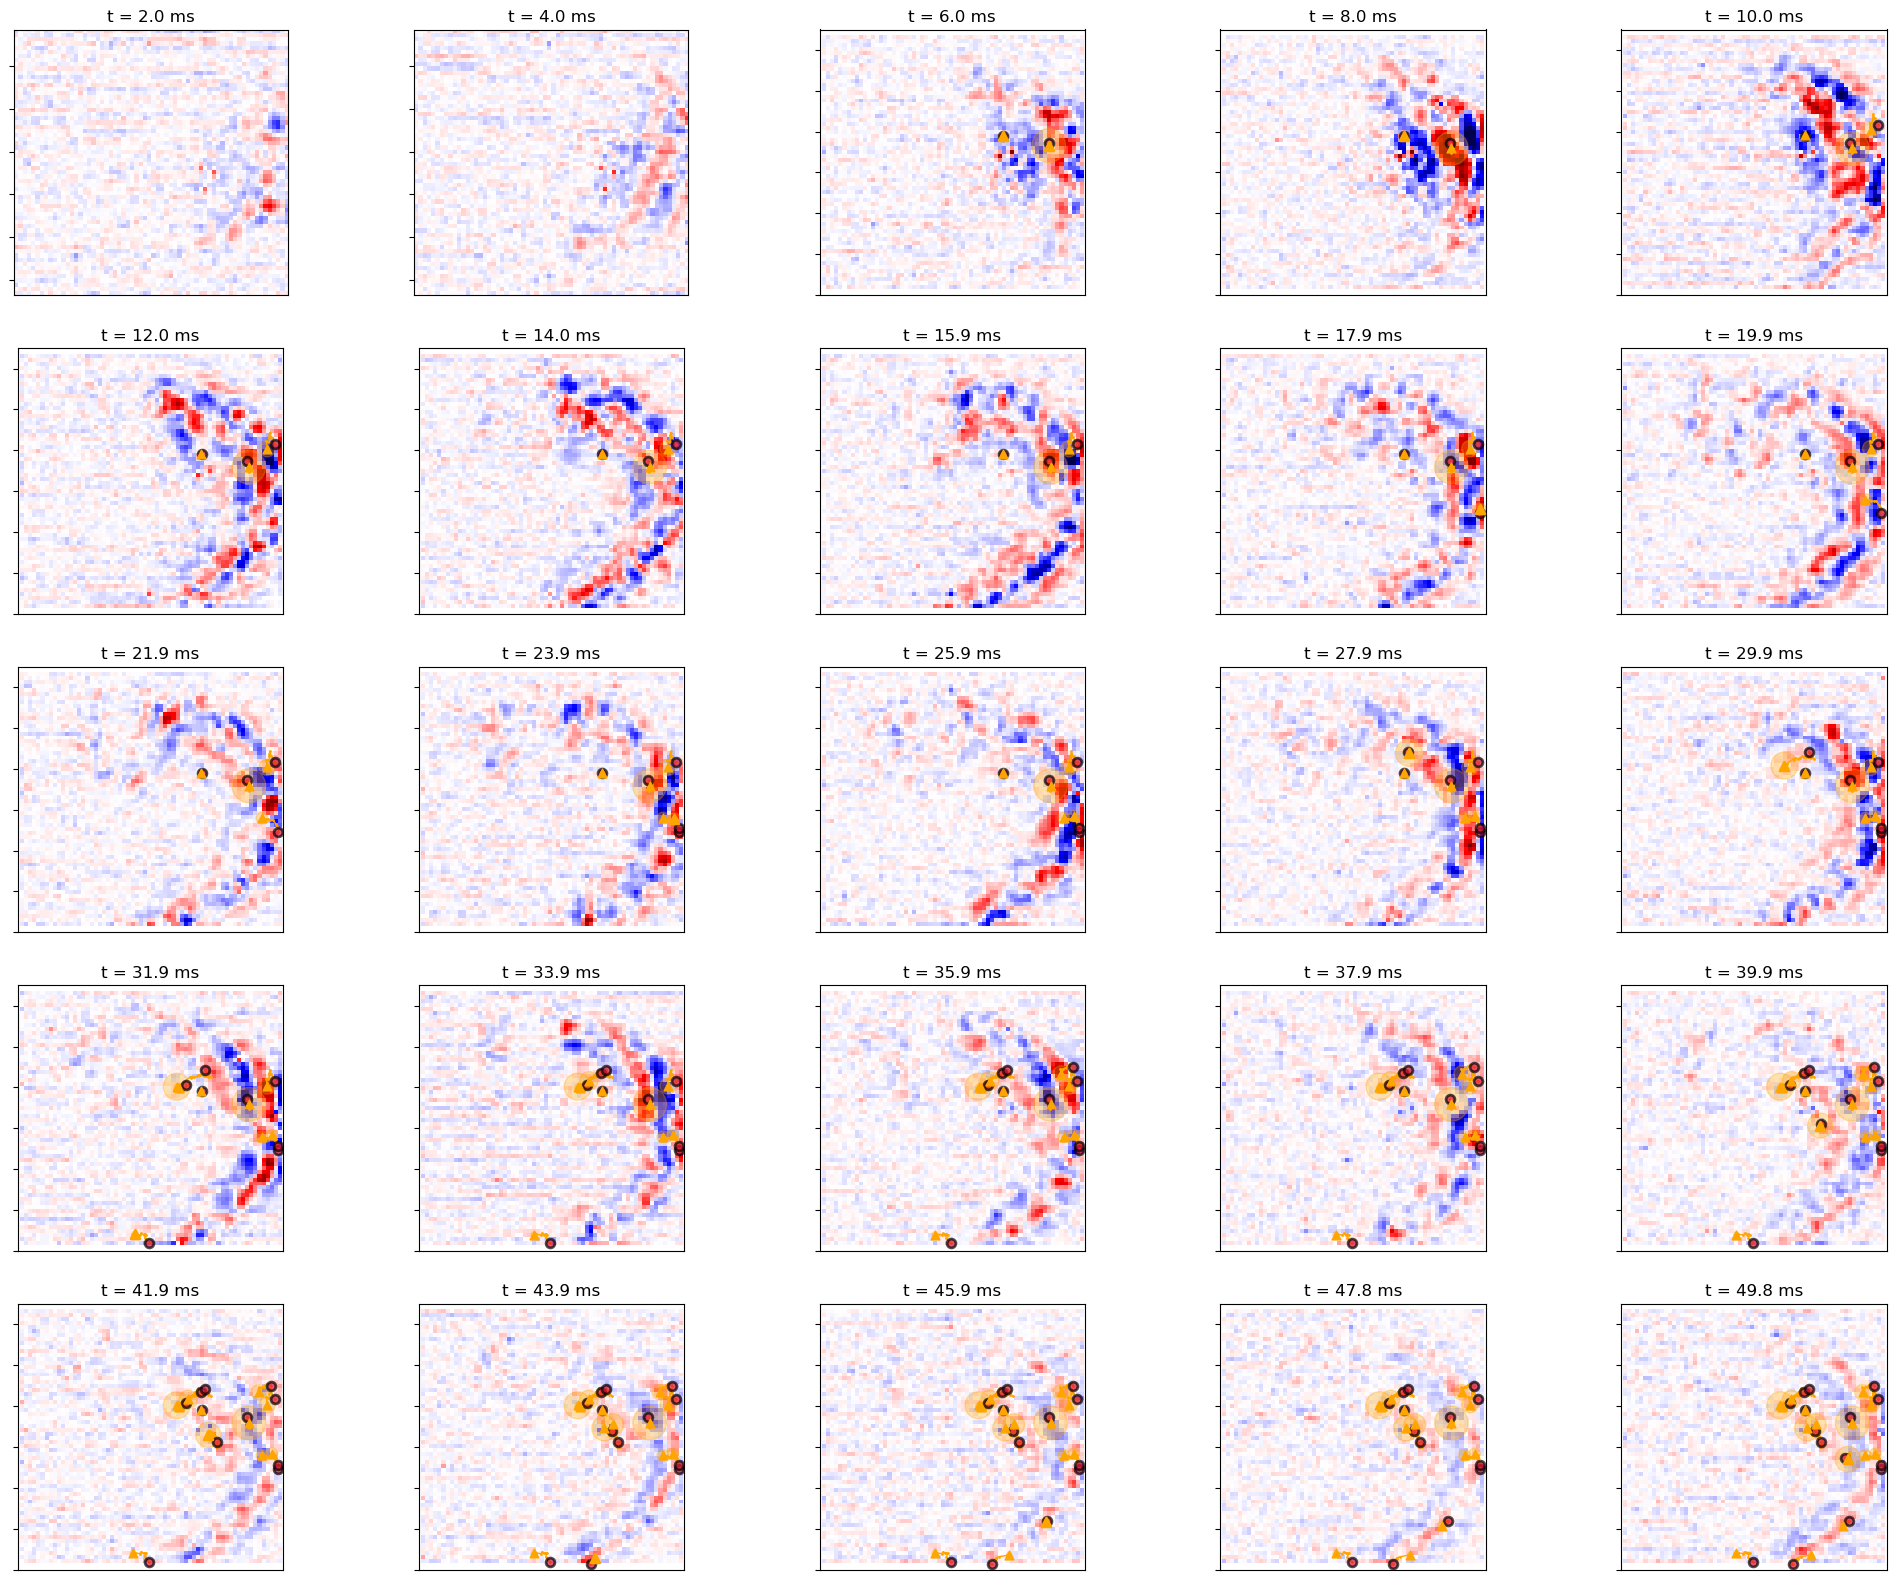

919.416151 seconds (289.99 k allocations: 13.475 MiB, 0.00% gc time)


In [20]:
ion()
farofa, lista=subplots(5,5, figsize=(25,20))
limcsd=100
inicio=1056
fin=1500
retrazo=inicio

@time for j=1:25
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    #reallambda=(1+intervalo*j/rangolambda)
    if pa==0; pa=5;end
    cuadro=inicio+j*14
    milisec=round((cuadro-retrazo)/freq,1)
    lista[pu,pa][:imshow](csd[:,:,cuadro],cmap="seismic",vmin=-limcsd,vmax=limcsd,
        interpolation="nearest",extent=[0.5,64.5,63.5,1.5])
    lista[pu,pa][:set_title]("t = $milisec ms")
    lista[pu,pa][:tick_params](bottom="off", axis="both",which="both", labelbottom="off", labelleft="off")

for (k,p) in cmpred

    paux=AntesQue(p,cuadro+1)
    paux=DespuesQue(paux,retrazo)
    cucho,fleto=size(paux)
     longus,falsus=size(p)
    #    println("Hola, soy asi de gordo ", mean(gordura))
        
        if  cucho>0
        #Si son chiquitos no nos interesan.
            xxpos=paux[:,1]
            yypos=paux[:,2]    
            gordis=abs.(map(Float32, paux[:,3]))
        
            lista[pu,pa][:set_xlim]([0,65])
            lista[pu,pa][:set_ylim]([0,65])
            
            lista[pu,pa][:plot](xxpos, yypos, marker="o", markersize=1, color="orange", lw=1,zorder=1998)
            lista[pu,pa][:scatter](xxpos[end],yypos[end],marker="o", s=0.125*gordis, color="orange",alpha=0.3)
            
            inicios=lista[pu,pa][:scatter](xxpos[1],yypos[1], s=40, edgecolors="black", 
            linewidth=2,facecolor="crimson", alpha=0.7, marker="o", label="Final",zorder=1999 )
            
           
            if paux[end,1]==p[end,1]
                finales=lista[pu,pa][:scatter](xxpos[end],yypos[end], s=40, edgecolors="orange", 
                linewidth=1,
                facecolor="orange", marker="^", label="Final",zorder=2000 )
            else
                finales=lista[pu,pa][:scatter](xxpos[end],yypos[end], s=40, edgecolors="orange", 
                linewidth=2,
                facecolor="orange", marker="^", label="Final" ,zorder=2000)
            end
   
        
   #=
            if(length(tiempos)>1)
                dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                vel=round(dist*freq,1)
                annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="cyan", zorder=1950)
            end
     =#       
    end
end
end

savefig("MosaicoFuentes_140116s2cut2_evento_2.png")
savefig("MosaicoFuentes_140116s2cut2_evento_2.svg")



(3, 4)